In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 데이터 준비
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 신경망 구조 설계
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation="relu", input_shape=(784,)))
dmlp.add(Dense(units=512, activation="relu"))
dmlp.add(Dense(units=512, activation="relu"))
dmlp.add(Dense(units=10, activation="softmax"))

# 학습
dmlp.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('정확률 =', dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

dmlp.save('dmlp_trained.h5')

Epoch 1/50


/opt/anaconda3/envs/cv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 - 3s - 6ms/step - accuracy: 0.9387 - loss: 0.1998 - val_accuracy: 0.9673 - val_loss: 0.0978
Epoch 2/50
469/469 - 3s - 7ms/step - accuracy: 0.9756 - loss: 0.0787 - val_accuracy: 0.9770 - val_loss: 0.0711
Epoch 3/50
469/469 - 4s - 8ms/step - accuracy: 0.9839 - loss: 0.0517 - val_accuracy: 0.9754 - val_loss: 0.0774
Epoch 4/50
469/469 - 4s - 8ms/step - accuracy: 0.9878 - loss: 0.0397 - val_accuracy: 0.9773 - val_loss: 0.0770
Epoch 5/50
469/469 - 4s - 8ms/step - accuracy: 0.9895 - loss: 0.0332 - val_accuracy: 0.9750 - val_loss: 0.0963
Epoch 6/50
469/469 - 4s - 8ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9791 - val_loss: 0.0795
Epoch 7/50
469/469 - 4s - 8ms/step - accuracy: 0.9913 - loss: 0.0269 - val_accuracy: 0.9806 - val_loss: 0.0723
Epoch 8/50
469/469 - 4s - 8ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.9816 - val_loss: 0.0682
Epoch 9/50
469/469 - 4s - 8ms/step - accuracy: 0.9942 - loss: 0.0176 - val_accuracy: 0.9784 - val_loss: 0.0878
Epoch 10/50


정확률 = 98.71000051498413


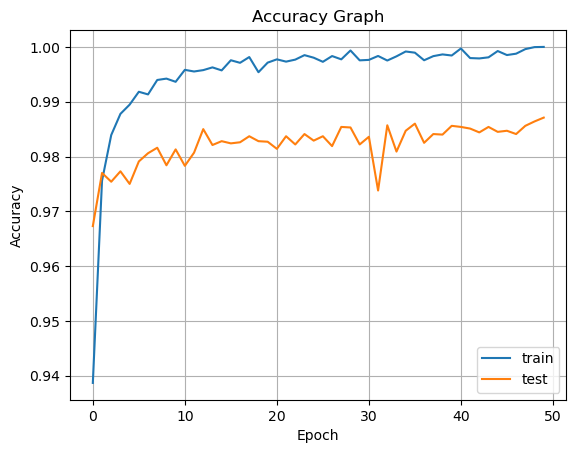

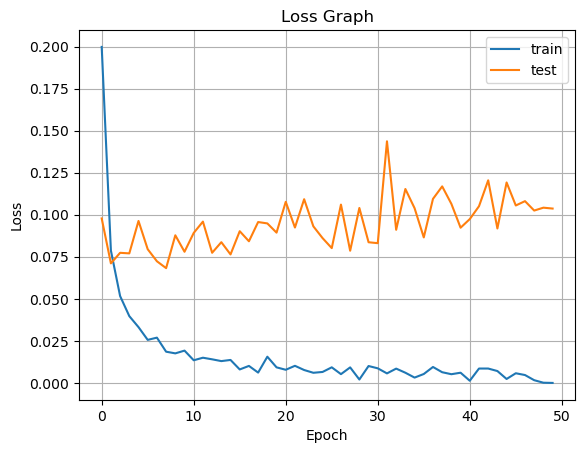

In [2]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Graph')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()